<a href="https://colab.research.google.com/github/Ayanlola2002/CryptoAPlication/blob/master/AppDownload.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
files.upload()

Saving app_download.csv to app_download (1).csv


{'app_download.csv': b'1,ABOVE_THE_FOLD,522594.0,GOOGLE_ADX,69,SM-A530F,0,0,0,BANNER_AND_VIDEO,-1,90,Samsung\n1,ABOVE_THE_FOLD,522594.0,GOOGLE_ADX,69,SM-A530F,0,0,0,BANNER_AND_VIDEO,-1,90,Samsung\n1,POSITION_UNKNOWN,4560349.0,RUBICON,69,SM-J327T,0,1,1,VIDEO,-1,0,Samsung\n1,ABOVE_THE_FOLD,1486910.0,GOOGLE_ADX,69,Q3551,0,0,0,BANNER_AND_VIDEO,-1,90,Micromax\n1,ABOVE_THE_FOLD,1486910.0,GOOGLE_ADX,69,Q3551,0,0,0,BANNER_AND_VIDEO,-1,90,Micromax\n1,ABOVE_THE_FOLD,1486910.0,GOOGLE_ADX,69,Q3551,0,0,0,BANNER_AND_VIDEO,-1,90,Micromax\n1,,,MOPUB,69,SM-J327A,0,0,0,NATIVE,-1,1940,Samsung\n1,,,MOPUB,69,SM-J327A,0,0,0,NATIVE,-1,1940,Samsung\n1,,4560349.0,OPENX,69,MP450,0,0,0,VIDEO,-1,0,LG\n1,,4560349.0,OPENX,69,MP450,0,0,0,VIDEO,-1,0,LG\n1,POSITION_UNKNOWN,4951788.0,RUBICON,69,Z557BL,0,1,1,VIDEO,-1,0,ZTE\n1,POSITION_UNKNOWN,4951788.0,RUBICON,69,Z557BL,0,1,1,VIDEO,-1,0,ZTE\n1,,4633419.0,PULSEPOINT,69,UL40,0,1,1,VIDEO,-1,0,-1\n1,,4633419.0,PULSEPOINT,69,UL40,0,1,1,VIDEO,-1,0,-1\n1,ABOVE_THE_FOLD,551487.

In [0]:
!pip install rfpimp

  Running setup.py bdist_wheel for rfpimp ... - done
  Stored in directory: /root/.cache/pip/wheels/89/b6/b5/feff4a3b6d4307f12a249bedf676f94ea1eb31b59d1aa95ccd
  Running setup.py bdist_wheel for sklearn ... - done
  Stored in directory: /root/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built rfpimp sklearn


In [0]:
!pip install missingno

In [0]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
from rfpimp import feature_corr_matrix
from sklearn.model_selection import (
    cross_val_score,
    RepeatedKFold,
    GridSearchCV,RandomizedSearchCV
)
import warnings

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [0]:
data = pd.read_csv("app_download.csv")

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15047 entries, 0 to 15046
Data columns (total 13 columns):
1                   15047 non-null int64
ABOVE_THE_FOLD      8923 non-null object
522594.0            13627 non-null float64
GOOGLE_ADX          15047 non-null object
69                  15047 non-null object
SM-A530F            15047 non-null object
0                   15047 non-null int64
0.1                 15047 non-null int64
0.2                 15047 non-null int64
BANNER_AND_VIDEO    15047 non-null object
-1                  15047 non-null int64
90                  15047 non-null int64
Samsung             15047 non-null object
dtypes: float64(1), int64(6), object(6)
memory usage: 1.5+ MB


In [0]:
  data.columns = ['conversions_r', 'ad_position', 'geo_city', 'inventory_source', 'platform_browser_version',	'platform_device_model', 'video_companion_required',	'video_completes',	'video_midpoints',	'placement_type',	'banner_width',	'bid_floor_micros',	'platform_device_make']



In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15047 entries, 0 to 15046
Data columns (total 13 columns):
conversions_r               15047 non-null int64
ad_position                 8923 non-null object
geo_city                    13627 non-null float64
inventory_source            15047 non-null object
platform_browser_version    15047 non-null object
platform_device_model       15047 non-null object
video_companion_required    15047 non-null int64
video_completes             15047 non-null int64
video_midpoints             15047 non-null int64
placement_type              15047 non-null object
banner_width                15047 non-null int64
bid_floor_micros            15047 non-null int64
platform_device_make        15047 non-null object
dtypes: float64(1), int64(6), object(6)
memory usage: 1.5+ MB


In [0]:
def df_datatypes(dataframe):
    print(dataframe.columns.to_series().groupby(dataframe.dtypes).groups)

In [0]:
df_datatypes(data)

{dtype('int64'): Index(['conversions_r', 'video_companion_required', 'video_completes',
       'video_midpoints', 'banner_width', 'bid_floor_micros'],
      dtype='object'), dtype('float64'): Index(['geo_city'], dtype='object'), dtype('O'): Index(['ad_position', 'inventory_source', 'platform_browser_version',
       'platform_device_model', 'placement_type', 'platform_device_make'],
      dtype='object')}


In [0]:
def missing(dataframe, graph=False):
    dataframe_na = (dataframe.isnull().sum() / len(dataframe)) * 100
    dataframe_na = dataframe_na.drop(dataframe_na[dataframe_na == 0].index).sort_values(
        ascending=False
    )[:30]
    missing_data = pd.DataFrame({"Missing Ratio": dataframe_na})
    print(missing_data.head(20))
    if graph == True:
        missing_data = dataframe.columns[dataframe.isnull().any()].tolist()
        msno.matrix(dataframe[missing_data])
        msno.heatmap(dataframe[missing_data], figsize=(20, 20))
        
def cardinality(dataframe, datatype):
    d = []
    columns = dataframe.dtypes[dataframe.dtypes == datatype].index
    # columns = dataframe.columns.tolist()
    for c in columns:
        data = dataframe[c].nunique()
        d.append({"Column": c, "UniqueValue": data})
    df = pd.DataFrame(d).sort_values(ascending=False, by="UniqueValue")
    print(df)

    
def define_vars(dataframe, card_thresh):
    dtypes = dataframe.dtypes
    cat_feats = dataframe.dtypes[dataframe.dtypes == "object"].index
    numeric_feats = dataframe.dtypes[dataframe.dtypes != "object"].index
    col_nunique = dict()
    for col in numeric_feats:
        col_nunique[col] = dataframe[col].nunique()
    col_nunique = pd.Series(col_nunique)
    cols_discrete = col_nunique[col_nunique < card_thresh].index.tolist()
    cols_continuous = col_nunique[col_nunique >= card_thresh].index.tolist()
    return cols_discrete, cols_continuous, cat_feats

def PlotCont(dataframe, columns):
    fcols = 2
    frows = len(columns)
    plt.figure(figsize=(3 * fcols, 4 * frows))
    i = 0
    for col in columns:
        i += 1
        ax = plt.subplot(frows, fcols, i)
        sns.distplot(dataframe[col], ax=ax)
    plt.xlabel(col)
    
def PlotCat(dataframe, cat_feats, fcols=3):
    fcols = fcols
    frows = ceil(len(cat_feats) / fcols)
    plt.figure(figsize=(20, frows * 4))

    for i, col in enumerate(cat_feats):
        plt.subplot(frows, fcols, i + 1)
        sns.countplot(dataframe[col])
        

def PlotCatRegress(dataframe,target,cat_feats,fcols=3):
    fcols = 3
    frows = ceil(len(cat_feats)/fcols)
    plt.figure(figsize = (20,frows*4))
    
    for i,col in enumerate(cat_feats):
        plt.subplot(frows,fcols,i+1)
        sns.violinplot(dataframe[col],dataframe[target],inner="stick")

# plots all continuous variables vs target


def PlotContRegress(dataframe,target,columns):
    fcols = 2
    frows = len(columns)
    plt.figure(figsize=(3*fcols,4*frows))
    i=0
    for col in columns:
        i+=1
        ax=plt.subplot(frows,fcols,i)
        sns.regplot(x=col,y=target,data=dataframe,ax=ax)
    plt.xlabel(col)

def pear_corr(dataframe):
    df_corr_mat = feature_corr_matrix(dataframe)
    df_corr_mat = df_corr_mat.dropna(axis='columns',how='all')
    df_corr_mat = df_corr_mat.dropna()
    df_corr_mat = df_corr_mat.values
    corr_condensed = hc.distance.squareform(1-df_corr_mat)
    z = hc.linkage(corr_condensed,method='average')
    fig = plt.figure(figsize=(20,10))
    dendrogram = hc.dendrogram(z,labels=dataframe.columns,orientation = 'left',leaf_font_size = 8)


In [0]:
missing(data)

             Missing Ratio
ad_position      40.699143
geo_city          9.437097


In [0]:
print(cardinality(data,datatype= 'int64'))
print(cardinality(data,datatype= 'float64'))
print(cardinality(data,datatype= 'object'))


                     Column  UniqueValue
5          bid_floor_micros          197
4              banner_width            8
0             conversions_r            2
1  video_companion_required            2
2           video_completes            2
3           video_midpoints            2
None
     Column  UniqueValue
0  geo_city         2873
None
                     Column  UniqueValue
3     platform_device_model         1571
5      platform_device_make          111
2  platform_browser_version           36
1          inventory_source           14
4            placement_type            5
0               ad_position            4
None


In [0]:
# Frequency tables for each categorical feature
for column in data.select_dtypes(include=['object']).columns:
    display(pd.crosstab(index=data[column], columns='% observations', normalize='columns'))


col_0,% observations
ad_position,
0,0.023535
ABOVE_THE_FOLD,0.687997
FULLSCREEN,0.007845
POSITION_UNKNOWN,0.280623


col_0,% observations
inventory_source,
AERSERV,0.009171
APP_LOVIN,0.003190
FYBER,0.004918
GOOGLE_ADX,0.362996
MILLENNIAL,0.001529
MOPUB,0.123812
OPENX,0.024058
OPERA_MEDIA,0.012029
PULSEPOINT,0.108394


col_0,% observations
platform_browser_version,
-1,0.146209
11,0.000266
30,0.012428
33,0.004984
37,0.000665
39,0.002193
4,0.007510
40,0.001196
43,0.002193


col_0,% observations
platform_device_model,
-1,0.016016
0PKX220,0.000399
0PM92,0.000133
1606,0.000332
1707,0.000199
1718,0.000133
1801,0.000266
2,0.000665
2 Lite,0.000199


col_0,% observations
placement_type,
BANNER,0.168472
BANNER_AND_VIDEO,0.195919
NATIVE,0.072174
UNKNOWN,0.013956
VIDEO,0.549478


col_0,% observations
platform_device_make,
-1,0.021067
4Good,0.000133
Acer,0.000199
Alcatel,0.015418
Aolixin,0.000066
Apple,0.138699
Archos,0.000066
Ark,0.000066
Asus,0.012627


,conversions_r,geo_city,video_companion_required,video_completes,video_midpoints,banner_width,bid_floor_micros
count,15047.000000,1.362700e+04,15047.000000,15047.000000,15047.000000,15047.000000,15047.000000
mean,0.335416,3.378730e+06,0.215259,0.406260,0.498771,61.074899,254.800359
std,0.472151,2.060906e+06,0.411015,0.491151,0.500015,131.273919,660.981708
min,0.000000,-1.000000e+00,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,0.000000,5.548400e+05,0.000000,0.000000,0.000000,-1.000000,0.000000
50%,0.000000,4.360321e+06,0.000000,0.000000,0.000000,-1.000000,10.000000
75%,1.000000,4.990729e+06,0.000000,1.000000,1.000000,-1.000000,90.000000
max,1.000000,1.179039e+07,1.000000,1.000000,1.000000,1024.000000,5430.000000


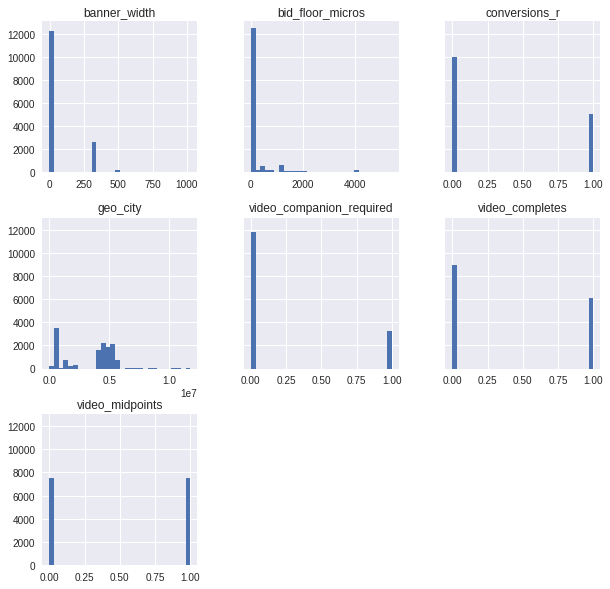

In [0]:
# Histograms for each numeric features
display(data.describe())
%matplotlib inline
hist = data.hist(bins=30, sharey=True, figsize=(10, 10))

In [0]:
discrete,cont,cat = define_vars(data,1)

In [0]:
data['banner_width'].value_counts()

-1       12242
 320      2600
 480       193
 300         5
 1024        3
 468         2
 728         1
 360         1
Name: banner_width, dtype: int64

In [0]:
import matplotlib.pyplot as plt 
import seaborn as sns


In [0]:
for column in data.select_dtypes(include=['object']).columns:
    if column != 'conversions_r':
        display(pd.crosstab(index=data[column], columns=data['conversions_r'], normalize='columns'))

for column in data.select_dtypes(exclude=['object']).columns:
    print(column)
    hist = data[[column, 'conversions_r']].hist(by="conversions_r", bins=30)
    plt.show()

conversions_r,0,1
ad_position,,
0,0.026526,0.018067
ABOVE_THE_FOLD,0.766470,0.544532
FULLSCREEN,0.003988,0.014897
POSITION_UNKNOWN,0.203017,0.422504


conversions_r,0,1
inventory_source,,
AERSERV,0.0069,0.013671
APP_LOVIN,0.0018,0.005944
FYBER,0.0024,0.009907
GOOGLE_ADX,0.4114,0.267089
MILLENNIAL,0.0023,0.000000
MOPUB,0.1212,0.128988
OPENX,0.0230,0.026154
OPERA_MEDIA,0.0093,0.017436
PULSEPOINT,0.0897,0.145433


conversions_r,0,1
platform_browser_version,,
-1,0.1599,0.119081
11,0.0004,0.000000
30,0.0157,0.005944
33,0.0058,0.003368
37,0.0010,0.000000
39,0.0030,0.000594
4,0.0101,0.002378
40,0.0012,0.001189
43,0.0027,0.001189


conversions_r,0,1
platform_device_model,,
-1,0.0166,0.014860
0PKX220,0.0004,0.000396
0PM92,0.0000,0.000396
1606,0.0002,0.000594
1707,0.0000,0.000594
1718,0.0002,0.000000
1801,0.0001,0.000594
2,0.0010,0.000000
2 Lite,0.0003,0.000000


conversions_r,0,1
placement_type,,
BANNER,0.2487,0.009511
BANNER_AND_VIDEO,0.1631,0.260947
NATIVE,0.0824,0.051912
UNKNOWN,0.0153,0.011294
VIDEO,0.4905,0.666336


conversions_r,0,1
platform_device_make,,
-1,0.0229,0.017436
4Good,0.0002,0.000000
Acer,0.0003,0.000000
Alcatel,0.0144,0.017436
Aolixin,0.0001,0.000000
Apple,0.1544,0.107589
Archos,0.0001,0.000000
Ark,0.0001,0.000000
Asus,0.0145,0.008916


conversions_r


ValueError: ignored

,conversions_r,geo_city,video_companion_required,video_completes,video_midpoints,banner_width,bid_floor_micros
conversions_r,1.000000,0.110172,-0.053568,0.273021,0.258074,-0.172216,0.115177
geo_city,0.110172,1.000000,0.326127,0.438635,0.545681,-0.462428,0.188337
video_companion_required,-0.053568,0.326127,1.000000,0.119223,0.267930,0.022907,-0.084285
video_completes,0.273021,0.438635,0.119223,1.000000,0.810551,-0.182595,0.204079
video_midpoints,0.258074,0.545681,0.267930,0.810551,1.000000,-0.260840,0.171180
banner_width,-0.172216,-0.462428,0.022907,-0.182595,-0.260840,1.000000,-0.054719
bid_floor_micros,0.115177,0.188337,-0.084285,0.204079,0.171180,-0.054719,1.000000


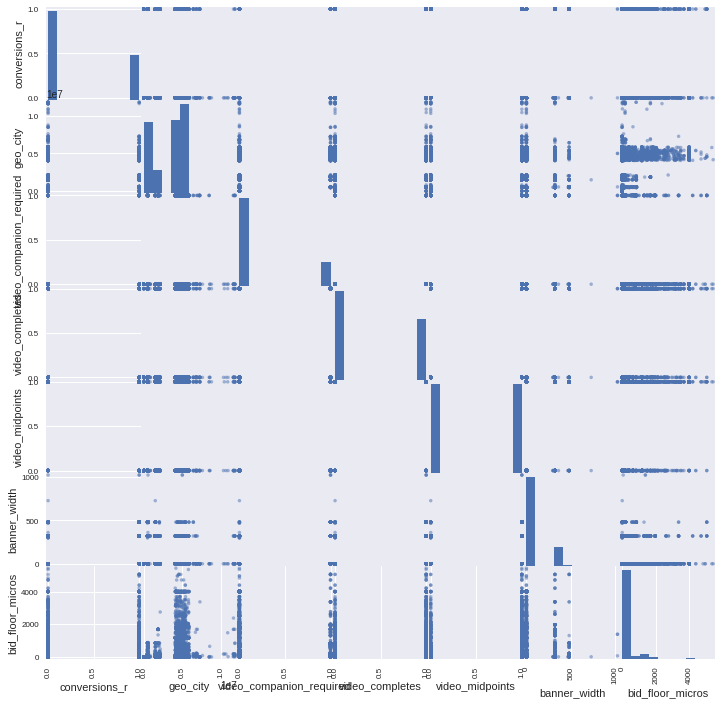

In [0]:
display(data.corr())
pd.plotting.scatter_matrix(data, figsize=(12, 12))
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  cat_pos = np.ones(swarm_data.size) * center


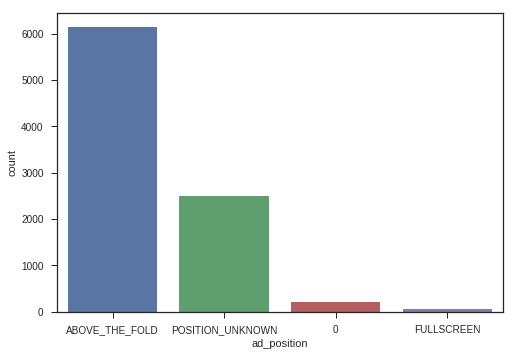

In [0]:
 ax = sns.countplot(x="ad_position", data=data) #hue="who",

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  confint = []


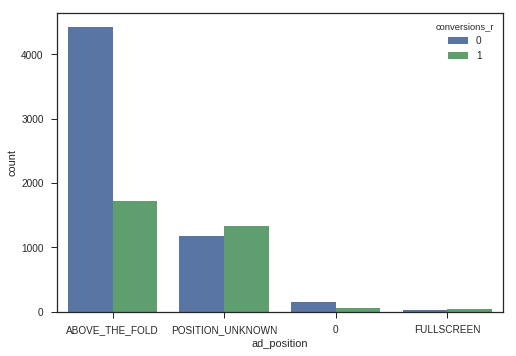

In [0]:
ax = sns.countplot(x="ad_position", hue="conversions_r", data=data) 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  confint = []


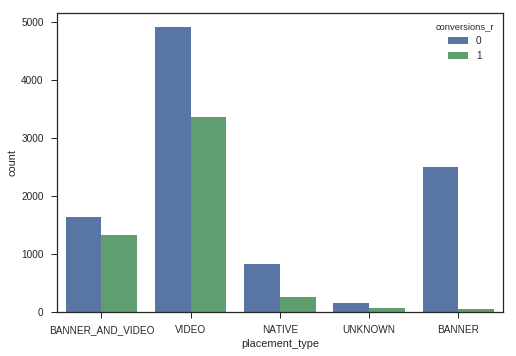

In [0]:
ax = sns.countplot(x="placement_type", hue="conversions_r", data=data) 


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  cat_pos = np.ones(swarm_data.size) * center


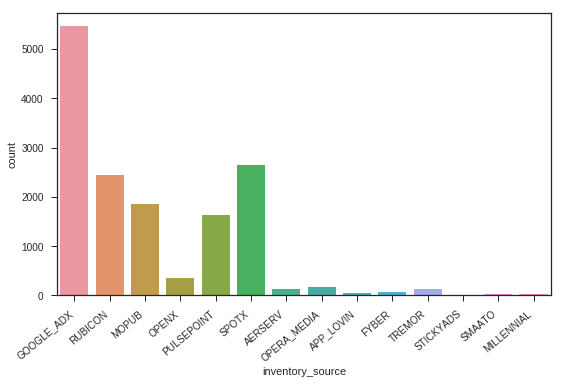

In [0]:

ax = sns.countplot(x="inventory_source",data=data) 

#data["inventory_source"].hist()
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  confint = []


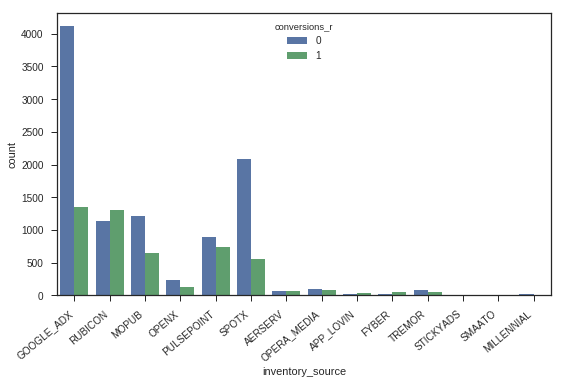

In [0]:
ax = sns.countplot(x="inventory_source", hue="conversions_r", data=data) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  cat_pos = np.ones(swarm_data.size) * center


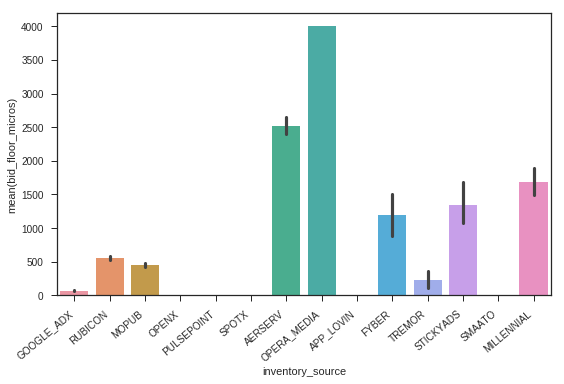

In [0]:
ax = sns.barplot(x="inventory_source", y="bid_floor_micros", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  confint = []


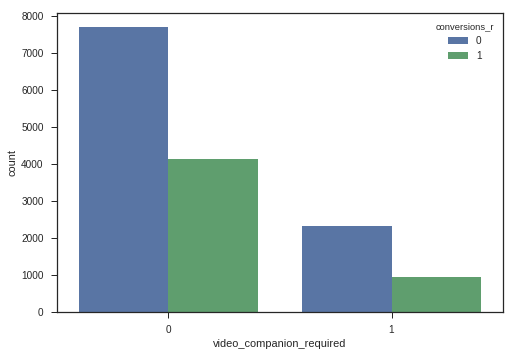

In [0]:
ax = sns.countplot(x="video_companion_required", hue="conversions_r", data=data) 


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  confint = []


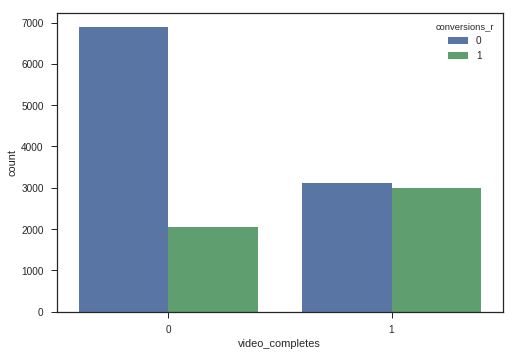

In [0]:
ax = sns.countplot(x="video_completes", hue="conversions_r", data=data) 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  confint = []


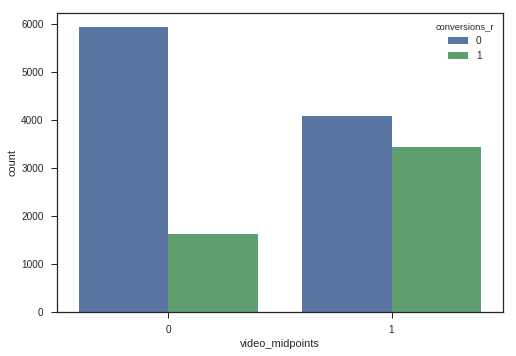

In [0]:
ax = sns.countplot(x="video_midpoints", hue="conversions_r", data=data) 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  confint = []


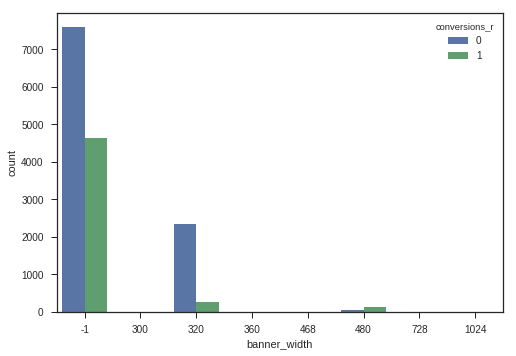

In [0]:
ax = sns.countplot(x="banner_width", hue="conversions_r", data=data) 

In [0]:
data["banner_width"].value_counts()

-1       12242
 320      2600
 480       193
 300         5
 1024        3
 468         2
 728         1
 360         1
Name: banner_width, dtype: int64

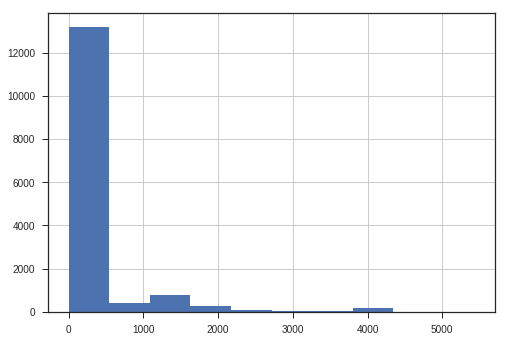

In [0]:
data["bid_floor_micros"].hist()

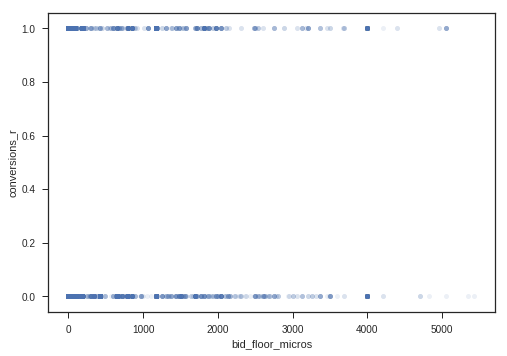

In [0]:
data.plot(kind='scatter',x="bid_floor_micros",y="conversions_r",alpha="0.1")

In [0]:
data.loc[data["platform_browser_version"] == 0]

,conversions_r,ad_position,geo_city,inventory_source,platform_browser_version,platform_device_model,video_companion_required,video_completes,video_midpoints,placement_type,banner_width,bid_floor_micros,platform_device_make


In [0]:
data.loc[data['platform_browser_version'] == 'UNKNOWN', 'platform_browser_version'] = 0

data['platform_browser_version'] = pd.to_numeric(data['platform_browser_version'], errors='raise')

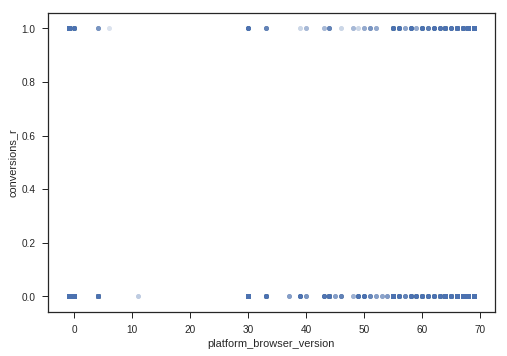

In [0]:
data.plot(kind='scatter',x="platform_browser_version",y="conversions_r",alpha="0.1")

In [0]:
ax = sns.countplot(x="inventory_source", hue="conversions_r", data=data) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [0]:
!pip install seaborn==0.9.0

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  cat_pos = np.ones(swarm_data.size) * center


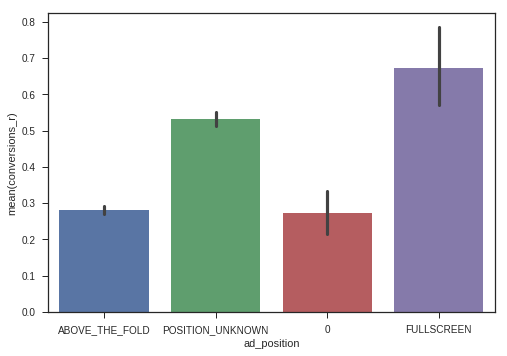

In [0]:
ax = sns.barplot(x="ad_position", y="conversions_r", data=data)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  cat_pos = np.ones(swarm_data.size) * center


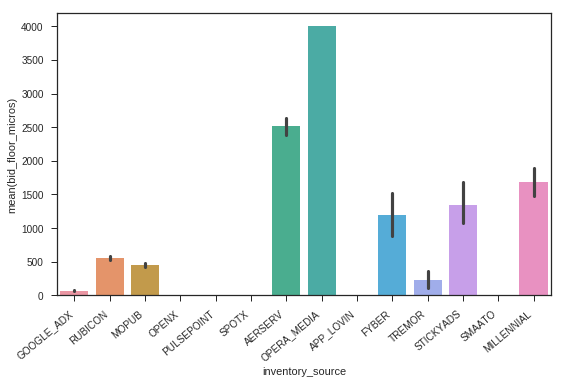

#Preprocessing features

##inventory_source

In [0]:
data['inventory_source'].value_counts()

GOOGLE_ADX     5462
SPOTX          2653
RUBICON        2448
MOPUB          1863
PULSEPOINT     1631
OPENX           362
OPERA_MEDIA     181
AERSERV         138
TREMOR          125
FYBER            74
APP_LOVIN        48
MILLENNIAL       23
SMAATO           20
STICKYADS        19
Name: inventory_source, dtype: int64

In [0]:
inv = pd.get_dummies(data["inventory_source"], drop_first=True)

In [0]:
data = pd.concat([data, inv], axis=1)

##ad_position

In [0]:
data.loc[data['ad_position'].isnull() == True, 'ad_position'] = "POSITION_UNKNOWN"

In [0]:
data['ad_position'].value_counts()

POSITION_UNKNOWN    8628
ABOVE_THE_FOLD      6139
0                    210
FULLSCREEN            70
Name: ad_position, dtype: int64

In [0]:
adp = pd.get_dummies(data["ad_position"], drop_first=True)

In [0]:
data = pd.concat([data, adp], axis=1)

##platform_browser_version

In [0]:
data.loc[data['platform_browser_version'] == 'UNKNOWN', 'platform_browser_version'] = 0

data['platform_browser_version'] = pd.to_numeric(data['platform_browser_version'], errors='raise')

##platform_device_make

In [0]:
adp = pd.get_dummies(data["platform_device_make"], drop_first=True)

In [0]:
adp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15047 entries, 0 to 15046
Columns: 110 entries, 4Good to Zoji
dtypes: uint8(110)
memory usage: 1.6 MB


In [0]:
data = pd.concat([data, adp], axis=1)

##placement_type

In [0]:
data["placement_type"].value_counts()

VIDEO               8268
BANNER_AND_VIDEO    2948
BANNER              2535
NATIVE              1086
UNKNOWN              210
Name: placement_type, dtype: int64

In [0]:
pt = pd.get_dummies(data["placement_type"], drop_first=True )
data = pd.concat([data, pt], axis=1)

##geo_city 

In [0]:
data['geo_city'].value_counts()

 524901.0     741
 498817.0     352
 542420.0     250
-1.0          210
 5368361.0    196
 4699066.0    183
 4887398.0    182
 551487.0     176
 4684888.0    165
 1496747.0    163
 1486209.0    151
 499099.0     132
 4560349.0    111
 4164138.0    110
 4180439.0    103
 520555.0     101
 4167147.0     93
 501175.0      82
 479561.0      79
 5308655.0     77
 487846.0      75
 4990729.0     73
 4140963.0     73
 5419384.0     72
 472045.0      68
 5506956.0     68
 4174757.0     62
 4726206.0     61
 1508291.0     60
 498677.0      54
             ... 
 477795.0       1
 5416516.0      1
 4236895.0      1
 4845193.0      1
 4150190.0      1
 5345679.0      1
 4049086.0      1
 5184082.0      1
 4952731.0      1
 562245.0       1
 1484871.0      1
 5414872.0      1
 545788.0       1
 5152794.0      1
 4266813.0      1
 5808276.0      1
 4497622.0      1
 4528923.0      1
 4628735.0      1
 4953127.0      1
 4366852.0      1
 4366647.0      1
 5284202.0      1
 4891010.0      1
 4891051.0

## Deleting encoded fetures

In [0]:
data = data.drop(columns=[ 'ad_position', 'platform_device_model', 'placement_type', 'inventory_source', 'platform_device_make'])

In [0]:
data['platform_device_model'].value_counts()

iPhone             1342
SM-G950U            249
-1                  241
MP260               177
Redmi 4X            162
SM-G965U            160
SM-J327T1           157
SM-G960U            153
iPhone 7            151
SM-J120F            150
SM-G955U            150
SM-N950U            144
SM-J320F            140
SM-S327VL           137
Redmi Note 4        135
SM-G930V            135
MS210               129
XT1766              117
SM-J727T1           116
SM-G532F            112
SM-A520F            103
LM-X210(G)          101
A574BL               99
SM-J327P             90
SP200                90
iPhone 6S            89
Redmi 4A             86
SM-J510FN            83
iPhone 6             78
iPhone 8             72
                   ... 
R9                    1
C525e                 1
SM-J510F              1
FRD-L02               1
ZB500KG (X00BD)       1
E500                  1
A109                  1
X603                  1
F2                    1
BQ-5071               1
BBF100-2        

In [0]:
from sklearn.ensemble import RandomFromRegressor
